<a href="https://colab.research.google.com/github/mounikarevanuru/mlfoundations/blob/main/Data%20Preprocessimg/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**This section has code to read data from various sources**

#### **Reading from an existing library**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# iris is a dictionary like object that has various keys like data, feature_names, description etc. We will use these key names to extract the data we want
iris = load_iris()
iris

# Since iris is a dictionary object, we will convert that into a pandas dataframe
# specifying columns=iris.feature_names will take the value of feature_names from iris dict and use them as column names in pd df
features_df = pd.DataFrame(iris.data, columns=iris.feature_names)
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
## Now, we will read target values into a new df. Target dict key has values as 0,1,2, each specifying 'setosa', 'versicolor', 'virginica' (target_names) respectively.
target_df = pd.DataFrame(iris.target, columns=['target']) ## We are manually specifying the column name for the target values
target_df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
## We can also add target value to features_df

features_df['target'] = pd.DataFrame(iris.target)
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
## If we want to read the flower names instead of classes, this is how we do it.

features_df['flower_name'] = features_df.target.apply(lambda x: iris.target_names[x])
features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Best practice is to have features and target in the same dataset so that this
unified dataset can be used as input to split train, test and validate sets.**

#### **Reading from a csv/excel**

In [ ]:
df = pd.read_csv('/content/iris_dataset.csv')
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### **Reading from a JSON file**

In [ ]:
json_df = pd.read_json('/content/sample_json.json')
display(json_df.head())

,company,location,departments,founded,public
0,TechCorp,New York,"{'name': 'Engineering', 'manager': 'Alice Smit...",2010,True
1,TechCorp,New York,"{'name': 'Marketing', 'manager': 'Bob Johnson'...",2010,True


Once the JSON is loaded into a DataFrame, you can access individual fields (columns) like this:

In [ ]:
# Accessing a single column
company_names = json_df['company']
display(company_names)

,company
0,TechCorp
1,TechCorp


You can also select multiple columns:

In [ ]:
import pandas as pd
import json

# 1. Load JSON file
with open('sample_json.json') as f:
    data = json.load(f)

# 2. Flatten the 'departments' list, keeping company info as metadata
departments_df = pd.json_normalize(
    data,
    record_path='departments',      # list to expand
    meta=['company', 'location', 'founded', 'public'],  # top-level info to keep
    errors='ignore'
)

# 3. Flatten the 'employees' list within each department
employees_df = pd.json_normalize(
    data,
    record_path=['departments', 'employees'],   # nested list path
    meta=[['departments', 'name'], ['departments', 'manager'], 'company', 'location', 'founded', 'public'],
    errors='ignore'
)

# 4. Optional: Rename columns for clarity
employees_df.rename(columns={
    'departments.name': 'department_name',
    'departments.manager': 'department_manager'
}, inplace=True)

# 5. Show final DataFrame
employees_df


,id,name,role,skills,department_name,department_manager,company,location,founded,public
0,101,John Doe,Developer,"[Python, ML]",Engineering,Alice Smith,TechCorp,New York,2010,True
1,102,Jane Roe,Developer,"[Java, SQL]",Engineering,Alice Smith,TechCorp,New York,2010,True
2,201,Mike Lee,SEO Specialist,"[SEO, Analytics]",Marketing,Bob Johnson,TechCorp,New York,2010,True
3,202,Sara Kim,Content Writer,"[Writing, Social Media]",Marketing,Bob Johnson,TechCorp,New York,2010,True


#### **Reading from a text file with different delimiters**

In [ ]:
## This will generate the text files in various formats
# 1. Comma-delimited CSV
with open('comma.csv', 'w') as f:
    f.write("""name,age,city
Alice,25,New York
Bob,30,Los Angeles
Charlie,22,Chicago
""")

# 2. Tab-delimited TSV
with open('tab.tsv', 'w') as f:
    f.write("""name\tage\tcity
Alice\t25\tNew York
Bob\t30\tLos Angeles
Charlie\t22\tChicago
""")

# 3. Pipe-delimited
with open('pipe.txt', 'w') as f:
    f.write("""name|age|city
Alice|25|New York
Bob|30|Los Angeles
Charlie|22|Chicago
""")

# 4. Space-delimited
with open('space.txt', 'w') as f:
    f.write("""name age city
Alice 25 New_York
Bob 30 Los_Angeles
Charlie 22 Chicago
""")


In [ ]:
## Read each of them
df_comma = pd.read_csv('comma.csv', sep = ',')
df_comma

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,22,Chicago


In [ ]:
df_tab = pd.read_csv('tab.tsv', sep = '\t')
df_tab

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,22,Chicago


In [ ]:
df_space = pd.read_csv('space.txt', sep = ' ')
df_space

,name,age,city
0,Alice,25,New_York
1,Bob,30,Los_Angeles
2,Charlie,22,Chicago


In [ ]:
df_pipe = pd.read_csv('pipe.txt', sep = '|')
df_pipe

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,22,Chicago


In [ ]:
## If the file has headers
df_text_nh = pd.read_csv('tab.tsv', sep='\t', header=0) ## If there is no head, the value can be None else, specify the row # of the headers
df_text_nh

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,22,Chicago


In [ ]:
## Skip rows
# skiprows can also be a list of rows that want to be excluded [0,2,5,6]
# comment = '#' will ignore any rows that start with a #
df_comments = pd.read_csv('space.txt', sep=' ', skiprows=1, comment='#')
df_comments

,Alice,25,New_York
0,Bob,30,Los_Angeles
1,Charlie,22,Chicago


In [ ]:
# Read data in chunks
chunk_size = 10
for chunk in pd.read_csv('comma.csv', chunksize=chunk_size):
    print(chunk.head())

      name  age         city
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   22      Chicago


#**Inspect Data**

In [ ]:
## This will tell details like the column names, their data types, their nullability
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   flower_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
## Tells the number of rows and columns in the dataset
df.shape

(150, 6)

In [ ]:
## Gives the summary statistics for each of the column
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
## Unique value count
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target  flower_name
5.8                2.7               5.1                1.9               2       virginica      2
4.4                2.9               1.4                0.2               0       setosa         1
                   3.0               1.3                0.2               0       setosa         1
                   3.2               1.3                0.2               0       setosa         1
4.3                3.0               1.1                0.1               0       setosa         1
                                                                                                ..
7.7                2.6               6.9                2.3               2       virginica      1
                   2.8               6.7                2.0               2       virginica      1
                   3.0               6.1                2.3               2       virginica      1
                   3.8               6.7                2.2               2       virginica      1
7.9                3.8               6.4                2.0               2       virginica      1
Name: count, Length: 149, dtype: int64

In [ ]:
# Accessing rows by index
print("First 5 rows using iloc:")
display(df.iloc[:5])

# Accessing a specific row by index
print("\nRow at index 10 using iloc:")
display(df.iloc[10])

# Accessing rows by label (if index is not default integer index)
# For this DataFrame, the index is the default integer index, so iloc and loc are similar for row access.
# print("\nRows at index 0, 5, 10 using loc:")
# display(df.loc[[0, 5, 10]])

# Checking for unique values in a column
print("\nUnique values in 'flower_name' column:")
display(df['flower_name'].unique())

# Counting unique values in a column
print("\nNumber of unique values in 'flower_name' column:")
display(df['flower_name'].nunique())

# Checking for duplicate rows
print("\nAre there any duplicate rows?")
display(df.duplicated().any())

# Displaying duplicate rows
print("\nDuplicate rows (if any):")
display(df[df.duplicated()])

First 5 rows using iloc:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Row at index 10 using iloc:


,10
sepal length (cm),5.4
sepal width (cm),3.7
petal length (cm),1.5
petal width (cm),0.2
target,0
flower_name,setosa



Unique values in 'flower_name' column:


array(['setosa', 'versicolor', 'virginica'], dtype=object)


Number of unique values in 'flower_name' column:


3


Are there any duplicate rows?


np.True_


Duplicate rows (if any):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
142,5.8,2.7,5.1,1.9,2,virginica


In [ ]:
# Checking for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Checking for the proportion of missing values
print("\nProportion of missing values per column:")
display(df.isnull().sum() / len(df))

Missing values per column:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
flower_name,0



Proportion of missing values per column:


,0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0
petal width (cm),0.0
target,0.0
flower_name,0.0


> **Only Numeric columns are used for visulaization**


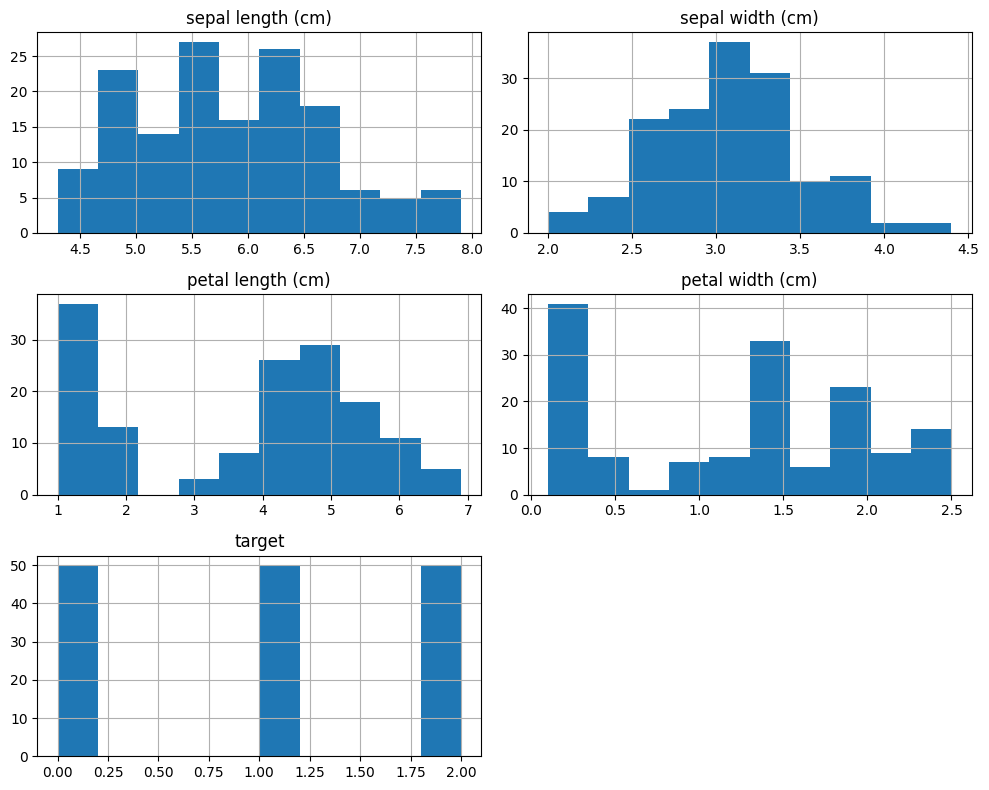

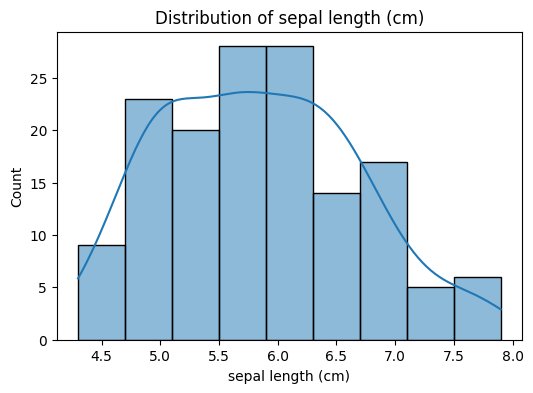

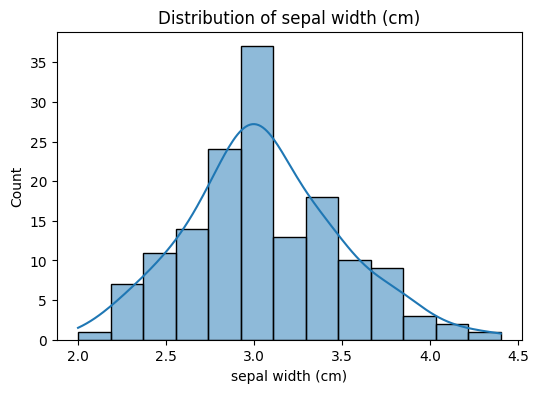

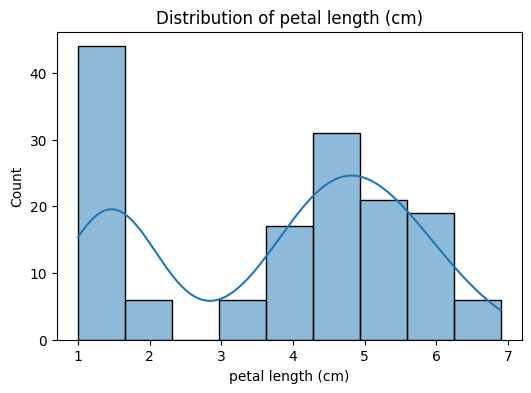

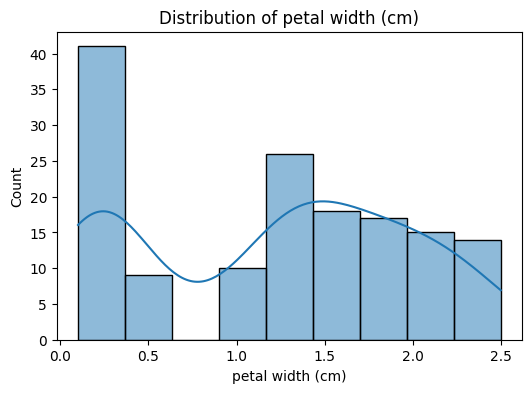

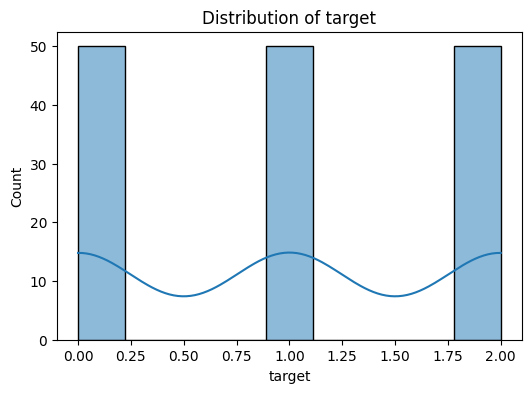

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Alternatively, use seaborn for more aesthetically pleasing plots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Check for class imbalance in the target column
print("Value counts for the target column:")
display(df['target'].value_counts())

# Alternatively, visualize the class distribution
# plt.figure(figsize=(6, 4))
# sns.countplot(data=df, x='target')
# plt.title('Distribution of Target Classes')
# plt.show()

Value counts for the target column:


,count
target,
0,50
1,50
2,50


In [ ]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


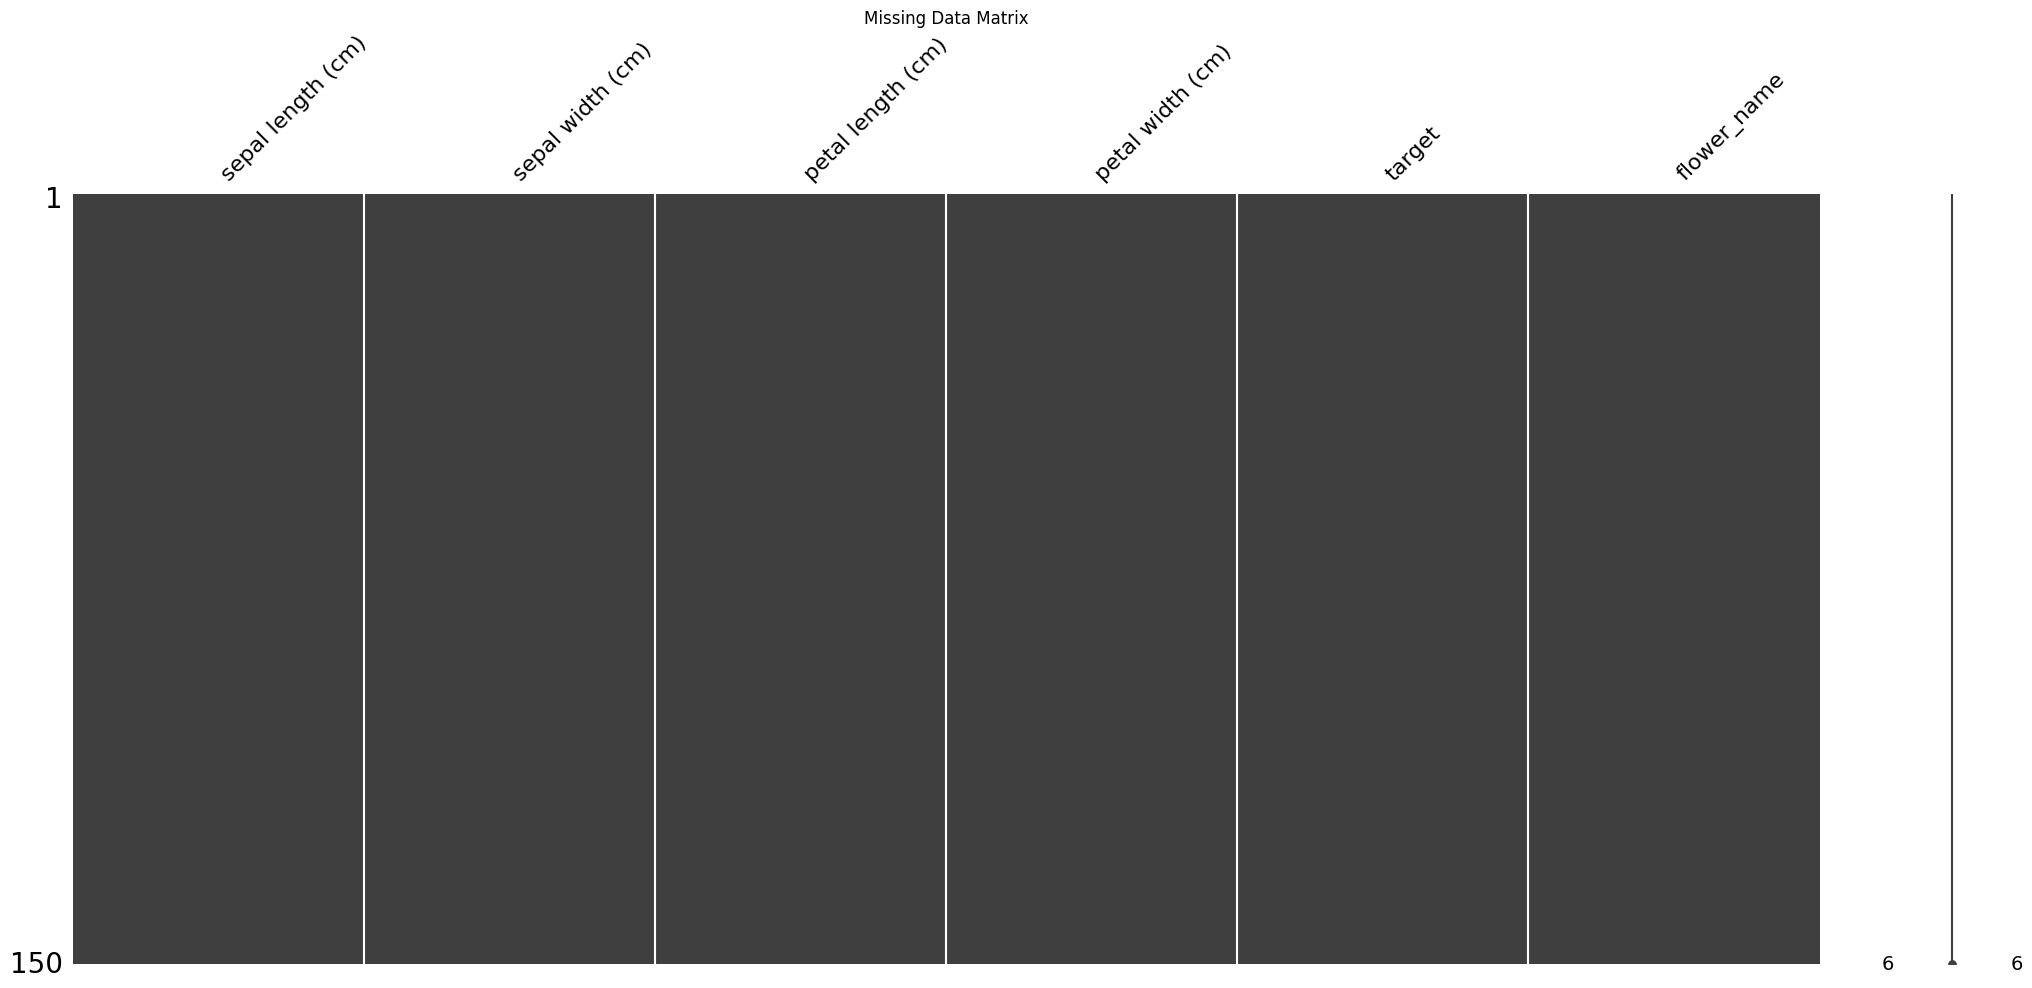

In [ ]:
import missingno as msno

# Visualize missing data patterns
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

# You can also visualize missing data as a bar chart
# msno.bar(df)
# plt.title('Missing Data Bar Chart')
# plt.show()

# Or as a heatmap to see the correlation of missingness between columns
# msno.heatmap(df)
# plt.title('Missing Data Heatmap')
# plt.show()

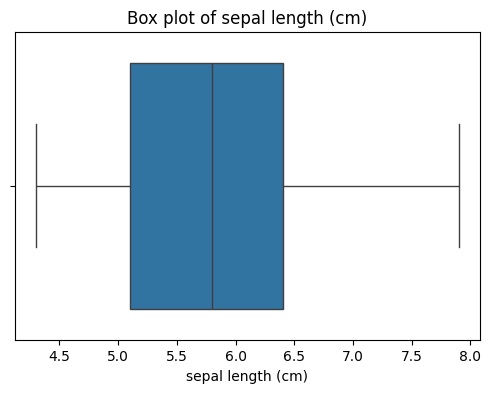

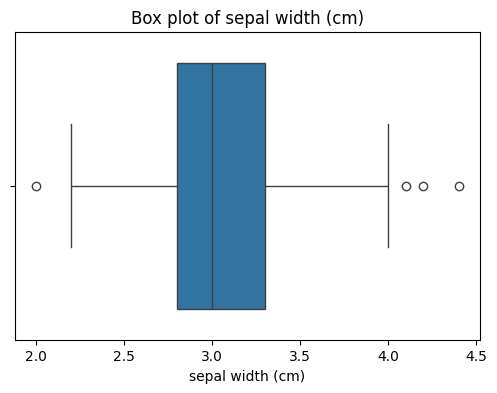

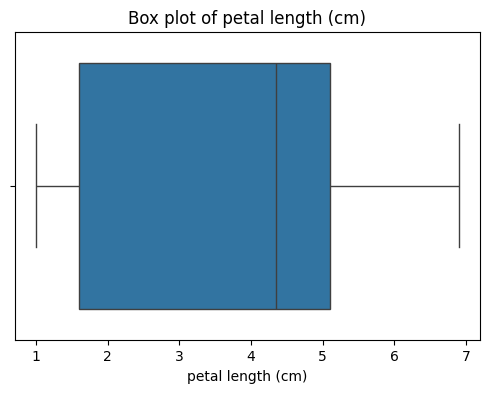

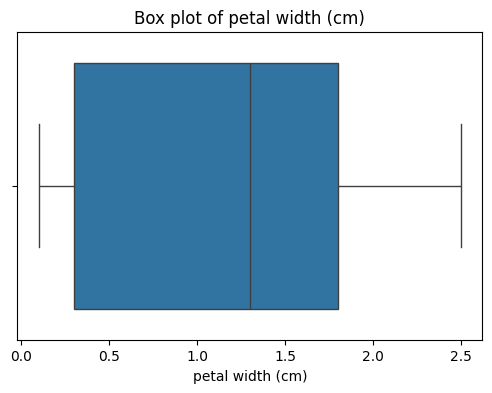

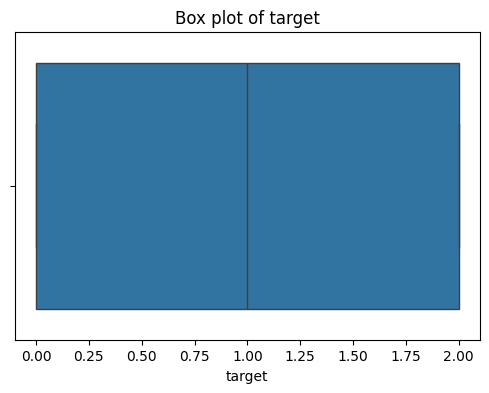

In [ ]:
# Draw box plots to identify outliers for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()